In [1]:
# Import findspark and initialize. 
import findspark
findspark.init()

In [2]:
from pyspark.sql import functions as F, types as T
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("sparkDates").getOrCreate()

23/11/09 00:06:43 WARN Utils: Your hostname, Justins-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.125 instead (on interface en0)
23/11/09 00:06:43 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/09 00:06:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/11/09 00:06:44 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
# Load in data
from pyspark import SparkFiles
url ="https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-classroom/v1.2/22-big-data/2/rainfall.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("rainfall.csv"), sep=",", header=True, inferSchema=True)
df.show()

+-----------+----------+----+----+
|    station|      date|prcp|tobs|
+-----------+----------+----+----+
|USC00519397|2010-01-01|0.08|  65|
|USC00519397|2010-01-02| 0.0|  63|
|USC00519397|2010-01-03| 0.0|  74|
|USC00519397|2010-01-04| 0.0|  76|
|USC00519397|2010-01-07|0.06|  70|
|USC00519397|2010-01-08| 0.0|  64|
|USC00519397|2010-01-09| 0.0|  68|
|USC00519397|2010-01-10| 0.0|  73|
|USC00519397|2010-01-11|0.01|  64|
|USC00519397|2010-01-12| 0.0|  61|
|USC00519397|2010-01-14| 0.0|  66|
|USC00519397|2010-01-15| 0.0|  65|
|USC00519397|2010-01-16| 0.0|  68|
|USC00519397|2010-01-17| 0.0|  64|
|USC00519397|2010-01-18| 0.0|  72|
|USC00519397|2010-01-19| 0.0|  66|
|USC00519397|2010-01-20| 0.0|  66|
|USC00519397|2010-01-21| 0.0|  69|
|USC00519397|2010-01-22| 0.0|  67|
|USC00519397|2010-01-23| 0.0|  67|
+-----------+----------+----+----+
only showing top 20 rows



In [4]:
# Show schema to confirm date type
df.printSchema()

root
 |-- station: string (nullable = true)
 |-- date: date (nullable = true)
 |-- prcp: double (nullable = true)
 |-- tobs: integer (nullable = true)



In [5]:
# Import date time functions
from pyspark.sql.functions import year

# Show the year for the date column
df.withColumn('date', year('date')).show()

+-----------+----+----+----+
|    station|date|prcp|tobs|
+-----------+----+----+----+
|USC00519397|2010|0.08|  65|
|USC00519397|2010| 0.0|  63|
|USC00519397|2010| 0.0|  74|
|USC00519397|2010| 0.0|  76|
|USC00519397|2010|0.06|  70|
|USC00519397|2010| 0.0|  64|
|USC00519397|2010| 0.0|  68|
|USC00519397|2010| 0.0|  73|
|USC00519397|2010|0.01|  64|
|USC00519397|2010| 0.0|  61|
|USC00519397|2010| 0.0|  66|
|USC00519397|2010| 0.0|  65|
|USC00519397|2010| 0.0|  68|
|USC00519397|2010| 0.0|  64|
|USC00519397|2010| 0.0|  72|
|USC00519397|2010| 0.0|  66|
|USC00519397|2010| 0.0|  66|
|USC00519397|2010| 0.0|  69|
|USC00519397|2010| 0.0|  67|
|USC00519397|2010| 0.0|  67|
+-----------+----+----+----+
only showing top 20 rows



In [6]:
# Save the year as a new column
df = df.withColumn('year', year('date'))
df.show()


+-----------+----------+----+----+----+
|    station|      date|prcp|tobs|year|
+-----------+----------+----+----+----+
|USC00519397|2010-01-01|0.08|  65|2010|
|USC00519397|2010-01-02| 0.0|  63|2010|
|USC00519397|2010-01-03| 0.0|  74|2010|
|USC00519397|2010-01-04| 0.0|  76|2010|
|USC00519397|2010-01-07|0.06|  70|2010|
|USC00519397|2010-01-08| 0.0|  64|2010|
|USC00519397|2010-01-09| 0.0|  68|2010|
|USC00519397|2010-01-10| 0.0|  73|2010|
|USC00519397|2010-01-11|0.01|  64|2010|
|USC00519397|2010-01-12| 0.0|  61|2010|
|USC00519397|2010-01-14| 0.0|  66|2010|
|USC00519397|2010-01-15| 0.0|  65|2010|
|USC00519397|2010-01-16| 0.0|  68|2010|
|USC00519397|2010-01-17| 0.0|  64|2010|
|USC00519397|2010-01-18| 0.0|  72|2010|
|USC00519397|2010-01-19| 0.0|  66|2010|
|USC00519397|2010-01-20| 0.0|  66|2010|
|USC00519397|2010-01-21| 0.0|  69|2010|
|USC00519397|2010-01-22| 0.0|  67|2010|
|USC00519397|2010-01-23| 0.0|  67|2010|
+-----------+----------+----+----+----+
only showing top 20 rows



In [7]:

# Find the average precipitation per year
df.groupBy('year').agg(F.avg('prcp')).show()

+----+-------------------+
|year|          avg(prcp)|
+----+-------------------+
|2015|0.19919999999999985|
|2013|0.15554567502020986|
|2014|0.17855953372189803|
|2012| 0.1163805668016194|
|2016|0.17984533591106822|
|2010|0.13852293920179035|
|2011| 0.1637348927875241|
|2017|0.16592738752959774|
+----+-------------------+



In [8]:
# Import the month function to get the month from the "Date" column. 
from pyspark.sql.functions import month


In [13]:
# Add a column, "month" to the DataFrame.
df = df.withColumn('month', month('date'))
df.show()

+-----------+----------+----+----+----+-----+
|    station|      date|prcp|tobs|year|month|
+-----------+----------+----+----+----+-----+
|USC00519397|2010-01-01|0.08|  65|2010|    1|
|USC00519397|2010-01-02| 0.0|  63|2010|    1|
|USC00519397|2010-01-03| 0.0|  74|2010|    1|
|USC00519397|2010-01-04| 0.0|  76|2010|    1|
|USC00519397|2010-01-07|0.06|  70|2010|    1|
|USC00519397|2010-01-08| 0.0|  64|2010|    1|
|USC00519397|2010-01-09| 0.0|  68|2010|    1|
|USC00519397|2010-01-10| 0.0|  73|2010|    1|
|USC00519397|2010-01-11|0.01|  64|2010|    1|
|USC00519397|2010-01-12| 0.0|  61|2010|    1|
|USC00519397|2010-01-14| 0.0|  66|2010|    1|
|USC00519397|2010-01-15| 0.0|  65|2010|    1|
|USC00519397|2010-01-16| 0.0|  68|2010|    1|
|USC00519397|2010-01-17| 0.0|  64|2010|    1|
|USC00519397|2010-01-18| 0.0|  72|2010|    1|
|USC00519397|2010-01-19| 0.0|  66|2010|    1|
|USC00519397|2010-01-20| 0.0|  66|2010|    1|
|USC00519397|2010-01-21| 0.0|  69|2010|    1|
|USC00519397|2010-01-22| 0.0|  67|

In [14]:
# Get the maximum precipitation for each month.
df.groupBy('month').agg(F.avg('prcp')).show()

+-----+-------------------+
|month|          avg(prcp)|
+-----+-------------------+
|   12|0.21681850533807792|
|    1|0.12997530864197532|
|    6|0.13635959339263018|
|    3|0.20422733077905494|
|    5|0.14567733990147788|
|    9|0.16424945612762884|
|    4| 0.1506394984326019|
|    8|0.14666219839142086|
|    7|0.16792224346717663|
|   10|0.15560553633218005|
|   11| 0.1803801169590643|
|    2| 0.1372714870395634|
+-----+-------------------+



In [17]:
# Import the summarized data to a pandas dataframe for plotting
# Note: If your summarized data is still too big for your local memory then your notebook may crash
df_new = df.groupBy('month').agg(F.avg('prcp')).toPandas()


In [18]:
df_new.head()

,month,avg(prcp)
0,12,0.216819
1,1,0.129975
2,6,0.136360
3,3,0.204227
4,5,0.145677


<Axes: xlabel='month'>

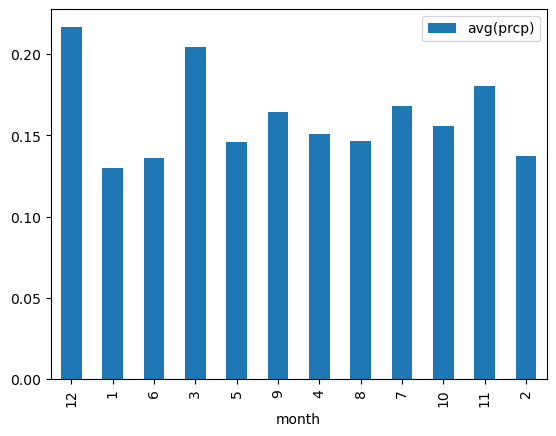

In [21]:
df_new.plot(kind='bar', x='month', y='avg(prcp)')

In [12]:
import plotly.express as px
# Create a Plotly graph.



23/11/09 00:06:56 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
